# Ford GoBike Dataset Explanation
## by Mohammed Ezzat Yassin

## Investigation Overview

In this investigation of the Ford GoBike System, I wanted to look at the riding habit/pattern for the numer of trips and trips duration with respect to time and rider gender, type, and age.

## Dataset Overview

The dataset includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area in feb, 2019.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
fordgobike = pd.read_csv('fordgobike-tripdata.csv')

In [3]:
#Perform some wrangling
#Change the start_time and end_time columns to date type
fordgobike['start_time'] = pd.to_datetime(fordgobike['start_time'])
fordgobike['end_time'] = pd.to_datetime(fordgobike['end_time'])

#Change the user_type and member_gender columns to category type
fordgobike['user_type'] = fordgobike['user_type'].astype('category')
fordgobike['member_gender'] = fordgobike['member_gender'].astype('category')

#convert the start_station_id, end_station_id and bike_id columns to string
fordgobike['start_station_id'] = fordgobike['start_station_id'].astype(str)
fordgobike['end_station_id'] = fordgobike['end_station_id'].astype(str)
fordgobike['bike_id'] = fordgobike['bike_id'].astype(str)
#Calculate the distances in meters between the start and end stations
from geopy.distance import geodesic

#Create a function to calculate the distances from the lattitude and longitude of stations
def distance_calc (row):
    start = (row['start_station_latitude'], row['start_station_longitude'])
    stop = (row['end_station_latitude'], row['end_station_longitude'])

    return geodesic(start, stop).meters

#create calc_dist column to store the calculated distances
fordgobike['calc_dist'] = fordgobike.apply (lambda row: distance_calc (row),axis=1)
#change the duration time to float and the convert the unit to minute
fordgobike['duration_min'] = fordgobike['duration_sec'] / 60

#create velocity in meter per seconds column of each trip
fordgobike['velocity'] = fordgobike['calc_dist'] / fordgobike['duration_sec']

#create columns for trip start date in yyyy-mm-dd format, trip start hour of the day, day of week
fordgobike['start_date'] = fordgobike.start_time.dt.strftime('%Y-%m-%d')
fordgobike['start_hour_ofday'] = fordgobike.start_time.dt.strftime('%H')
fordgobike['start_day_ofweek'] = fordgobike.start_time.dt.strftime('%A')

#Create a column for the age of riders
fordgobike['member_age'] = 2019 - fordgobike['member_birth_year']
#create a column for the day of week to be categories into weekend or work days
fordgobike['WEEKDAY'] = pd.to_datetime(fordgobike['start_time']).dt.dayofweek 
fordgobike['day_type'] = 0          
fordgobike.loc[fordgobike['WEEKDAY'].isin([5, 6]), 'day_type'] = 'weekend'  # 5 and 6 correspond to Sat and Sun
fordgobike.loc[fordgobike['WEEKDAY'].isin([0, 1, 2, 3, 4]), 'day_type'] = 'work_days'
fordgobike['day_type'] = fordgobike['day_type'].astype('category')
# Drop unused columns
fordgobike.drop(['duration_sec', 'start_time', 'end_time', 'start_station_latitude',
       'start_station_longitude', 'end_station_latitude', 'end_station_longitude', 'start_station_id', 'end_station_id', 'member_birth_year','start_date' ], axis = 1, inplace = True)


## First, lets explore the bike rides by gender:

#### Although, men are represents 75% of the reiders

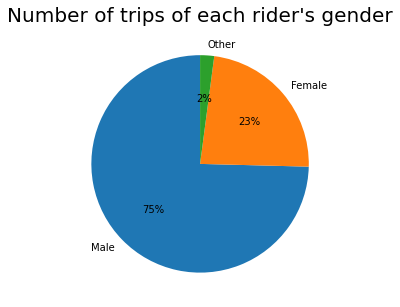

In [4]:
plt.figure(figsize=[8, 5])
sorted_counts = fordgobike['member_gender'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, autopct='%1.0f%%');
plt.title("Number of trips of each rider's gender", fontsize=20);

#### , and consequently have larger numer of trips than women, but women have average trips distance and duration larger than men especially at weekends.

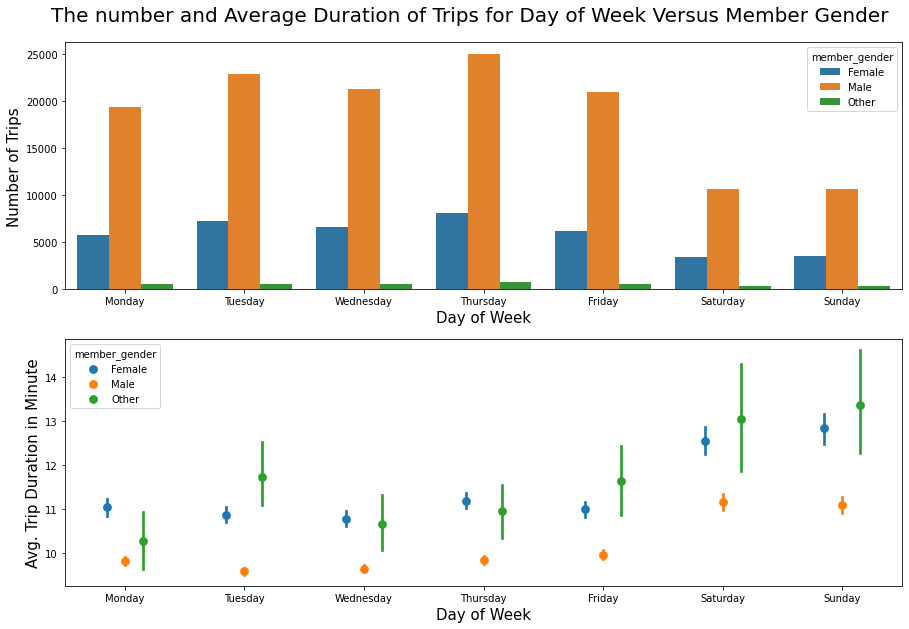

In [5]:
fordgobike1 = fordgobike[fordgobike['duration_min'] < 60]
plt.figure(figsize=[15, 10])
plt.suptitle('The number and Average Duration of Trips for Day of Week Versus Member Gender', fontsize=20, y=0.93)
order_days = ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday' )
plt.subplot(2, 1, 1)
sb.countplot(data = fordgobike, x = 'start_day_ofweek', hue = 'member_gender', order = order_days);
plt.xlabel('Day of Week', fontsize=15);
plt.ylabel('Number of Trips', fontsize=15);

plt.subplot(2, 1, 2)
sb.pointplot(data=fordgobike1, x='start_day_ofweek', y='duration_min', hue='member_gender', order = order_days, dodge=0.3, linestyles="");
plt.xlabel('Day of Week', fontsize=15);
plt.ylabel('Avg. Trip Duration in Minute', fontsize=15);

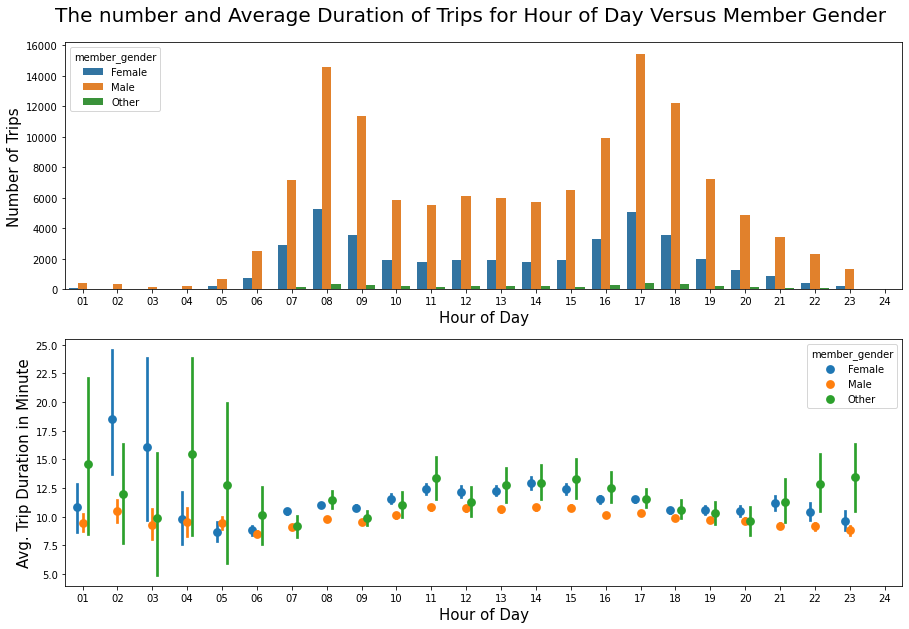

In [6]:
plt.figure(figsize=[15, 10])
plt.suptitle('The number and Average Duration of Trips for Hour of Day Versus Member Gender', fontsize=20, y=0.93)
order_hours = ('01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24')

plt.subplot(2, 1, 1)
sb.countplot(data = fordgobike, x = 'start_hour_ofday', hue = 'member_gender', order = order_hours);
plt.xlabel('Hour of Day', fontsize=15);
plt.ylabel('Number of Trips', fontsize=15);

plt.subplot(2, 1, 2)
sb.pointplot(data=fordgobike1, x='start_hour_ofday', y='duration_min', hue='member_gender', order = order_hours, dodge=0.3, linestyles="");
plt.xlabel('Hour of Day', fontsize=15);
plt.ylabel('Avg. Trip Duration in Minute', fontsize=15);

#### This pattern shows that women doesn't prefer using the service for work transportation than Exercising out of work times, this may be beacause of the physical exertion of bike riding or women work dressing style which doesn't convenient with bike pedaling. So that, ebikes those taking some of the effort out of pedaling will be an apporiate solution to increase the number of women riders.

## Next up, lets explore the bike rides at weekend and work days:

#### The number of trips show that the work days obsesse the most trips beacasue that the service is mainly used for work transportation especially at the ruch hours of going to (07, 08, 09) and from work (16, 17, 18).


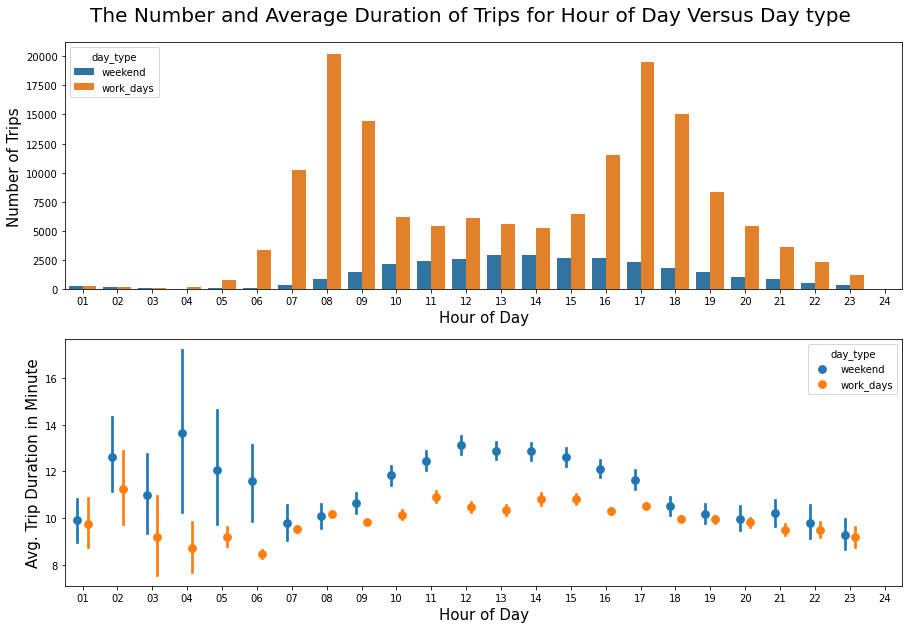

In [7]:
plt.figure(figsize=[15, 10])
plt.suptitle('The Number and Average Duration of Trips for Hour of Day Versus Day type', fontsize=20, y=0.93)

plt.subplot(2, 1, 1)
sb.countplot(data = fordgobike, x = 'start_hour_ofday', hue = 'day_type', order = order_hours);
plt.xlabel('Hour of Day', fontsize=15);
plt.ylabel('Number of Trips', fontsize=15);

plt.subplot(2, 1, 2)
sb.pointplot(data=fordgobike1, x='start_hour_ofday', y='duration_min', hue='day_type', order = order_hours, dodge=0.3, linestyles="");
plt.xlabel('Hour of Day', fontsize=15);
plt.ylabel('Avg. Trip Duration in Minute', fontsize=15);

#### While, the duration of trips show that the trips at weekends have a much higher average durations for the younger and older riders.



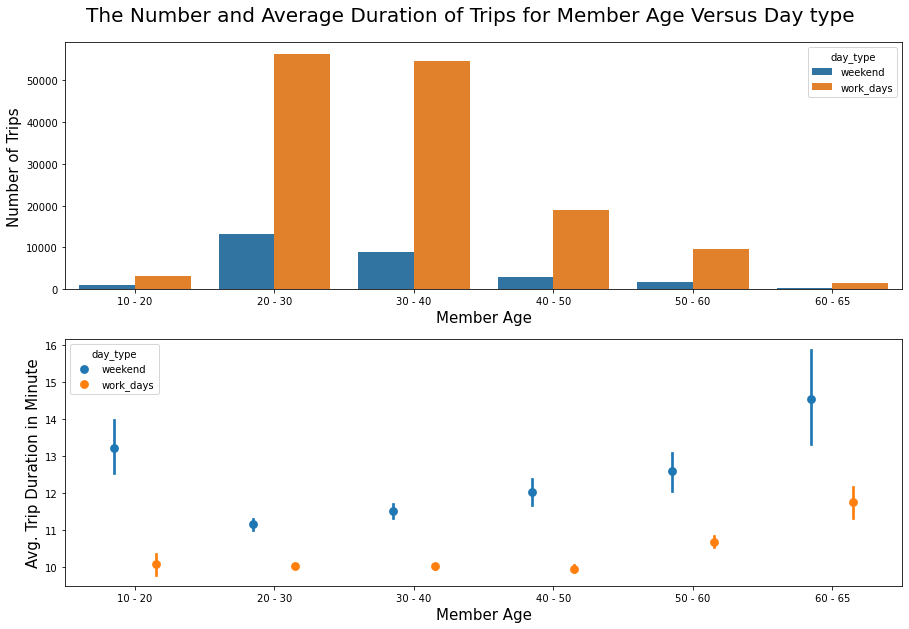

In [8]:
# Create a new field for member age group from member_age column order 
fordgobike3 = fordgobike[fordgobike['member_age'] < 65]
fordgobike5 = fordgobike3[fordgobike['duration_min'] < 60]

# Create a new field for member age group from member_age column order 
fordgobike3['age_bins'] = fordgobike3['member_age'].apply(lambda x: '10 - 20' if 10<x<=20
                                                  else '20 - 30' if 20<x<=30
                                                  else '30 - 40' if 30<x<=40
                                                  else '40 - 50' if 40<x<=50
                                                  else '50 - 60' if 50<x<=60
                                                  else '60 - 65' if 60<x<=65        
                                                  else x);
fordgobike5 = fordgobike3[fordgobike['duration_min'] < 60]

# plot The Number and Average Duration of Trips for member age Versus Day type
plt.figure(figsize=[15, 10])
plt.suptitle('The Number and Average Duration of Trips for Member Age Versus Day type', fontsize=20, y=0.93)
order_age = ('10 - 20', '20 - 30', '30 - 40', '40 - 50', '50 - 60', '60 - 65')

plt.subplot(2, 1, 1)
sb.countplot(data = fordgobike5, x = 'age_bins', hue = 'day_type', order = order_age);
plt.xlabel('Member Age', fontsize=15);
plt.ylabel('Number of Trips', fontsize=15);

plt.subplot(2, 1, 2)
sb.pointplot(data=fordgobike5, x='age_bins', y='duration_min', hue='day_type', dodge=0.3, linestyles="", order = order_age);
plt.xlabel('Member Age', fontsize=15);
plt.ylabel('Avg. Trip Duration in Minute', fontsize=15);



#### Also, the customers have constant usage of the service along the week days which reflects that at weekend at which the suscribers have a low service usage, the customers have an average duration of trips higher than the suscribers

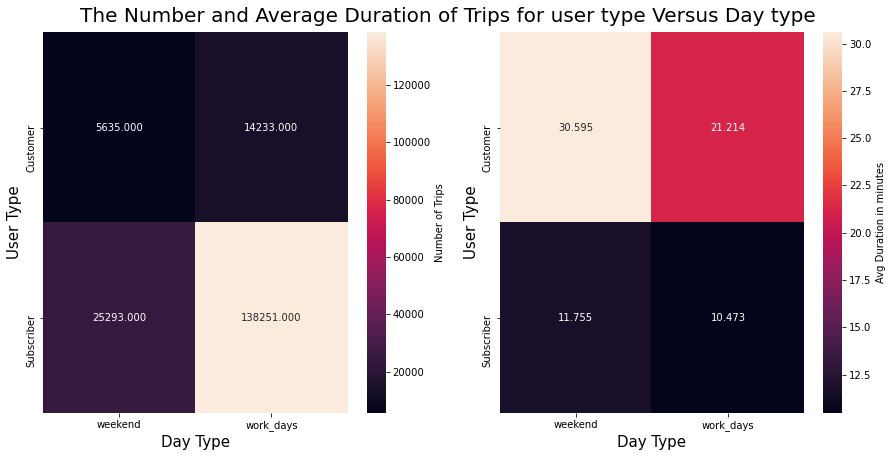

In [9]:
plt.figure(figsize=[15, 7])
plt.suptitle('The Number and Average Duration of Trips for user type Versus Day type', fontsize=20, y=0.93)

plt.subplot(1, 2, 1)

day_user = fordgobike.groupby(['day_type', 'user_type']).count()["bike_id"]
day_user = day_user.reset_index(name = 'num_trips')
day_user = day_user.pivot(index = 'user_type', columns = 'day_type',
                            values = 'num_trips')
sb.heatmap(day_user, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'Number of Trips'});
plt.xlabel('Day Type', fontsize=15);
plt.ylabel('User Type', fontsize=15);


plt.subplot(1, 2, 2)

day_user = fordgobike.groupby(['day_type', 'user_type']).mean()['duration_min']
day_user = day_user.reset_index(name = 'avg_duration')
day_user = day_user.pivot(index = 'user_type', columns = 'day_type',
                            values = 'avg_duration')
sb.heatmap(day_user, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'Avg Duration in minutes'});
plt.xlabel('Day Type', fontsize=15);
plt.ylabel('User Type', fontsize=15);

#### So that, the company should creates a special package for the weekend riding which will encourage much people whose prefer using the bikes as Exercising rather than work transportation to use the services. 
  